In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df6 = pd.read_csv("world-happiness-report-2021.csv")
df6.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [5]:
df6_new = df6[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', "Generosity", 'Perceptions of corruption']].copy()

In [12]:
df6_new.tail()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [20]:
df6_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


In [13]:
df6_new["Social support"].describe()

count    149.000000
mean       0.814745
std        0.114889
min        0.463000
25%        0.750000
50%        0.832000
75%        0.905000
max        0.983000
Name: Social support, dtype: float64

<AxesSubplot:xlabel='Social support'>

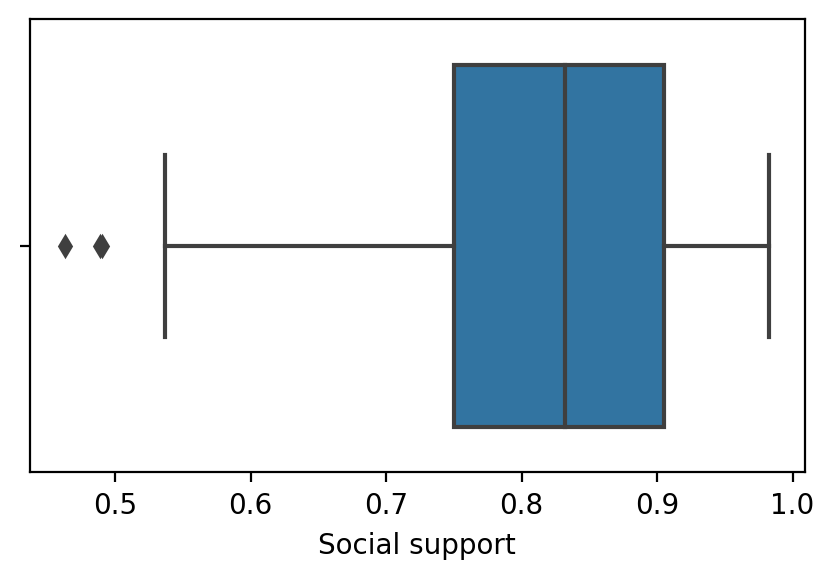

In [23]:
plt.figure(figsize=(5,3), dpi=200)
sns.boxplot(x='Social support', data=df6_new, orient='h')

In [14]:
Q1,Q3 = np.percentile(df6_new["Social support"],[25,75])
Q1, Q3

(0.75, 0.905)

In [16]:
Q1 = np.percentile(df6_new["Social support"], 25)
Q1

0.75

In [18]:
Q1 = np.quantile(df6_new["Social support"],q=0.25)
Q1

0.75

In [24]:
IQR = Q3 - Q1
IQR

0.15500000000000003

In [27]:
minimum_level = Q1 - IQR*1.5
minimum_level

0.5175

In [29]:

maximum_level = Q3 + IQR*1.5
maximum_level

1.1375000000000002

In [38]:
df_without_outliers = df6_new[~((df6_new["Social support"] > maximum_level) | (df6_new["Social support"] < minimum_level))]

In [46]:
df6_new[["Social support"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Social support,149.0,0.814745,0.114889,0.463,0.75,0.832,0.905,0.983


In [49]:
df_without_outliers[["Social support"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Social support,146.0,0.82161,0.105417,0.537,0.7625,0.834,0.90575,0.983


In [ ]:
# çoklu boxplot

<AxesSubplot:xlabel='Ladder score', ylabel='Regional indicator'>

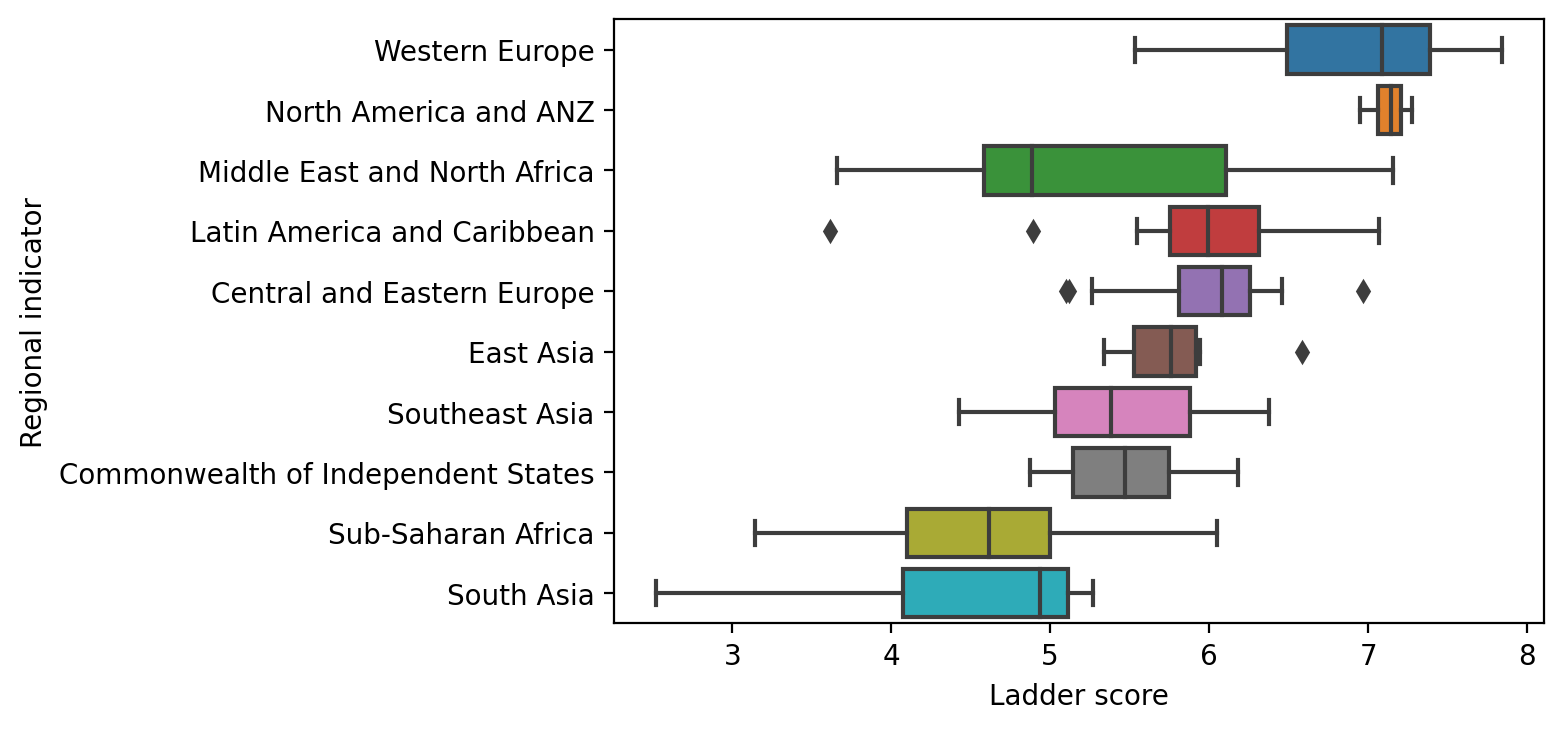

In [55]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(x="Ladder score",y ="Regional indicator", data=df6_new, orient='h')


In [57]:
df6_new[df6_new["Country name"] == "India"]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
138,India,South Asia,3.819,8.755,0.603,60.633,0.893,0.089,0.774
